In [43]:
!pip install opendatasets --upgrade --quiet


In [ ]:
# current: /Users/xiuwenzhu/Plant-Specimen-Image-Classification/lanternflowers.ipynb

In [44]:
import pandas as pd 
import os 
import opendatasets as od
import numpy as np



In [45]:

from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [88]:
# for building the cnn model for image classification
import tensorflow as tf
from keras import layers, models
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [101]:
# prepare pre-trained model 
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator


In [76]:


# Load the data
data_train = pd.read_csv('Lantern_Flowers_BTT/BTTAIxNYBG-train.csv')

# Print the first few rows of the data
print(data_train.head())

   uniqueID           classLabel  classID source             imageFile
0         2   occluded-specimens        8      L  a1a8b48e8cb142b3.jpg
1         3    microscope-slides        6      L  79599db2ac9092b6.jpg
2         4  illustrations-color        2    BHL  c449696f2f0d0d92.jpg
3         5  illustrations-color        2      P  80a8f4a393b4e08c.jpg
4         6     animal-specimens        0     AK  041a1c6e73313638.jpg


In [77]:
data_test = pd.read_csv('Lantern_Flowers_BTT/BTTAIxNYBG-test.csv')

# Print the first few rows of the data
print(data_test.head())

   uniqueID             imageFile
0         1  facd4dcd8e869617.jpg
1         9  78c96bb2b2b62579.jpg
2        10  d292d2c4e0e6ad9d.jpg
3        14  3633494929870713.jpg
4        16  dc94b496c8e2d6c4.jpg


In [78]:
x_train = np.array(data_train.iloc[:, 1:])
y_train = np.array(data_train.iloc[:, 0])

x_test = np.array(data_test.iloc[:, 1:])
y_test = np.array(data_test.iloc[:, 0])

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (81946, 4) y_train shape: (81946,)


In [79]:

print(data_train.describe())

            uniqueID       classID
count   81946.000000  81946.000000
mean    61352.780612      4.499597
std     35478.300906      2.872108
min         2.000000      0.000000
25%     30617.250000      2.000000
50%     61169.500000      4.000000
75%     92146.500000      7.000000
max    122879.000000      9.000000


In [80]:
# check if there are missing values
print(data_train.isnull().sum())


uniqueID      0
classLabel    0
classID       0
source        0
imageFile     0
dtype: int64


In [81]:
data_train.head()

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg


In [82]:
data_train['classLabel'].value_counts()

classLabel
live-plants                       8200
illustrations-color               8196
illustrations-gray                8196
biocultural-specimens             8195
micrographs-transmission-light    8195
occluded-specimens                8194
animal-specimens                  8194
mixed-pressed-specimens           8193
microscope-slides                 8192
ordinary-pressed-specimens        8191
Name: count, dtype: int64

In [83]:
# one hot encode the classes
data_encoded = pd.get_dummies(data_train, columns=['classLabel'])
print(data_encoded.head()) 

   uniqueID  classID source             imageFile  \
0         2        8      L  a1a8b48e8cb142b3.jpg   
1         3        6      L  79599db2ac9092b6.jpg   
2         4        2    BHL  c449696f2f0d0d92.jpg   
3         5        2      P  80a8f4a393b4e08c.jpg   
4         6        0     AK  041a1c6e73313638.jpg   

   classLabel_animal-specimens  classLabel_biocultural-specimens  \
0                        False                             False   
1                        False                             False   
2                        False                             False   
3                        False                             False   
4                         True                             False   

   classLabel_illustrations-color  classLabel_illustrations-gray  \
0                           False                          False   
1                           False                          False   
2                            True                          False   


In [84]:
%pip install pillow

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

## CNN


In [56]:
# Encode the class labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(data_train['classLabel'])

# Assuming data_train includes features (x_train) and labels (y_train)
x_train = data_train['imageFile']  # Replace with the actual feature column in your dataset
y_train_encoded = to_categorical(y_train_encoded)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)



In [57]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
alembic                       1.13.1
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
aniso8601                     9.0.1
annotated-types               0.6.0
anyio                         3.5.0
apispec                       5.2.2
apispec-webframeworks         0.5.2
appdirs                       1.4.4
applaunchservices             0.2.1
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomic

In [58]:

train_data_dir = 'Lantern_Flowers_BTT/BTTAIxNYBG-train.csv'


In [59]:
train_data = pd.read_csv(train_data_dir)


In [60]:
train_data.head()

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg


In [61]:
train_data['classLabel'].value_counts()

classLabel
live-plants                       8200
illustrations-color               8196
illustrations-gray                8196
biocultural-specimens             8195
micrographs-transmission-light    8195
occluded-specimens                8194
animal-specimens                  8194
mixed-pressed-specimens           8193
microscope-slides                 8192
ordinary-pressed-specimens        8191
Name: count, dtype: int64

In [62]:
train_data['uniqueID'].value_counts()

uniqueID
2         1
80442     1
81757     1
81754     1
81749     1
         ..
40771     1
40770     1
40769     1
40767     1
122879    1
Name: count, Length: 81946, dtype: int64

In [63]:
train_data.isnull().any()

uniqueID      False
classLabel    False
classID       False
source        False
imageFile     False
dtype: bool

In [64]:
# train_data.describe()

In [65]:
train_data['classID'].unique()

array([8, 6, 2, 0, 4, 1, 3, 7, 9, 5])

In [66]:
train_data['classLabel'].unique()

array(['occluded-specimens', 'microscope-slides', 'illustrations-color',
       'animal-specimens', 'live-plants', 'biocultural-specimens',
       'illustrations-gray', 'mixed-pressed-specimens',
       'ordinary-pressed-specimens', 'micrographs-transmission-light'],
      dtype=object)

In [67]:
# output the first five images frmo the dataset
train_data['imageFile'][:5]


0    a1a8b48e8cb142b3.jpg
1    79599db2ac9092b6.jpg
2    c449696f2f0d0d92.jpg
3    80a8f4a393b4e08c.jpg
4    041a1c6e73313638.jpg
Name: imageFile, dtype: object

In [68]:
import pandas as pd
from PIL import Image

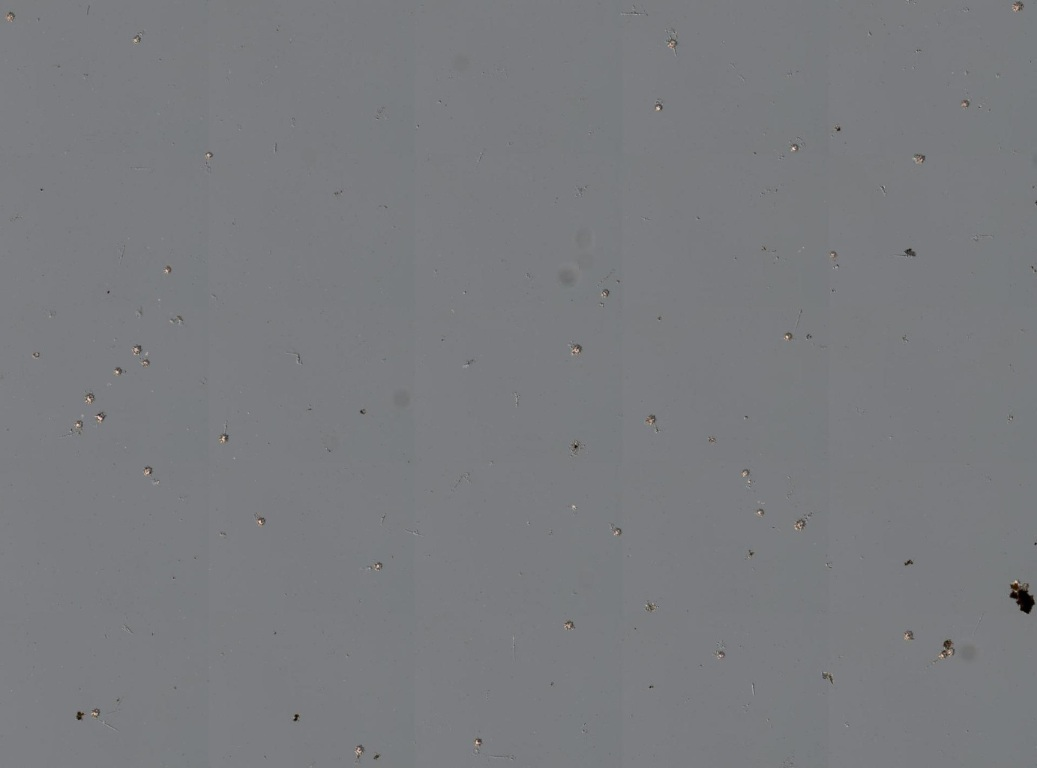

In [69]:
# print the first five images
from IPython.display import Image

# Define the image path - check the image path
img_path = 'Lantern_Flowers_BTT/BTTAIxNYBG-test/0000000000000000.jpg'

# test if the image is displayed
Image(filename=img_path)
    

In [70]:
# let's examine the dimenions for all the images in the training data set
# for CNN it is recommended for images to be of consistent size, how to handle this?
# should we handle horizontal and vertical images separately?

from PIL import Image

verticalImages = []
horizontalImages = []
# hmap for distinct image dimensions {(w,h) : count}
training_image_dimensions_collection = {}

for dirname, _, filenames in os.walk('Lantern_Flowers_BTT/BTTAIxNYBG-train'):
    for filename in filenames:
        image_path = os.path.join(dirname, filename)
        img = Image.open(image_path)
        width, height = img.size
        print(f"Image dimensions: {width} x {height}")
        if (width,height) in training_image_dimensions_collection:
            training_image_dimensions_collection[(width,height)] += 1
        else:
            training_image_dimensions_collection[(width,height)] = 1

        if width > height:
            horizontalImages.append(image_path)
        else:
            verticalImages.append(image_path)

Image dimensions: 768 x 1922
Image dimensions: 768 x 2230
Image dimensions: 2155 x 768
Image dimensions: 768 x 2217
Image dimensions: 768 x 1922
Image dimensions: 2155 x 768
Image dimensions: 768 x 2230
Image dimensions: 768 x 1927
Image dimensions: 768 x 1927
Image dimensions: 768 x 1922
Image dimensions: 768 x 1920
Image dimensions: 768 x 2227
Image dimensions: 768 x 1922
Image dimensions: 768 x 2230
Image dimensions: 768 x 2234
Image dimensions: 768 x 2217
Image dimensions: 768 x 2230
Image dimensions: 768 x 1915
Image dimensions: 768 x 2100
Image dimensions: 768 x 2227
Image dimensions: 768 x 2184
Image dimensions: 768 x 2230
Image dimensions: 768 x 2217
Image dimensions: 768 x 2224
Image dimensions: 768 x 2200
Image dimensions: 768 x 2131
Image dimensions: 768 x 2106
Image dimensions: 768 x 1925
Image dimensions: 768 x 2090
Image dimensions: 768 x 2217
Image dimensions: 768 x 1922
Image dimensions: 768 x 1922
Image dimensions: 768 x 2227
Image dimensions: 768 x 1922
Image dimensio

In [71]:
import copy
print(f"No. Vertical Images: {len(verticalImages)}\nNo. Horizontal Images: {len(horizontalImages)}")
print("\n\n")
print("The distinct number of dimensions are as follows")

# Compute mean x,y for horizontal and vertical image collections
# print(type(verticalImages),type(horizontalImages))
# lists
# print(horizontalImages[0]) # each entry is a image path

# vertical images dimensions list [(dim_x1,dim_y1),....]

# use numpy to get an average of the x and y dimenions for both horizontal and vertical image lists

import sys, functools
# store min dimensions for horiz,verti for resizing

min_x_h,min_y_h = sys.maxsize,sys.maxsize
min_x_v,min_y_v = sys.maxsize,sys.maxsize
print("determining min dimensions for v and h images....")
h_widths = [Image.open(i_path).size[0] for i_path in horizontalImages]
min_x_h = np.min(np.array(h_widths))
h_heights = [Image.open(i_path).size[1] for i_path in horizontalImages]
min_y_h = np.min(np.array(h_heights))
v_widths = [Image.open(i_path).size[0] for i_path in verticalImages]
min_x_v = np.min(np.array(v_widths))
v_heights = [Image.open(i_path).size[1] for i_path in verticalImages]
min_y_v = np.min(np.array(v_heights))

print("....done")
print("Min horizontal image dimensions are ...",min_x_h,min_y_h)
print("Min veritical image dimensions are ...",min_x_v,min_y_v)


No. Vertical Images: 64132
No. Horizontal Images: 17814



The distinct number of dimensions are as follows
determining min dimensions for v and h images....
....done
Min horizontal image dimensions are ... 769 768
Min veritical image dimensions are ... 768 768


## Note: 
From the output above, we can see the minimum horizontal image dimensions as 769 x 768 and the minimum vertical image dimensions as 768 x 768. The minimum dimensions are used to identify the smallest width and height among all the images in each category (horizontal and vertical).

The minimum dimensions (min_x_h, min_y_h, min_x_v, min_y_v) are then printed, and these values are used for resizing the images during the training process.

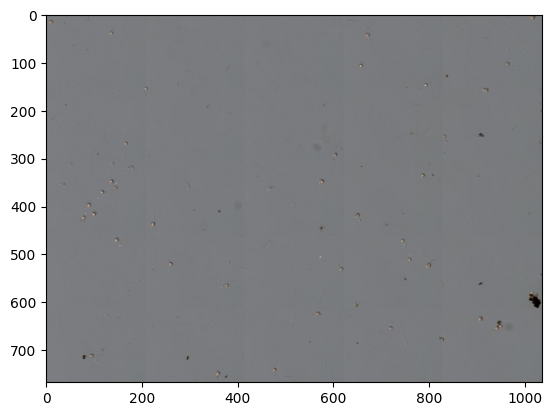

768 1037 3


In [87]:
import cv2
import matplotlib.pyplot as plt

# Define the image path - check the image path
img_path = 'Lantern_Flowers_BTT/BTTAIxNYBG-test/0000000000000000.jpg'

# Read the image using OpenCV
img = cv2.imread(img_path)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Print the dimensions of the image
height, width, channels = img.shape
print(height, width, channels)

In [89]:

for dirname, _, filenames in os.walk('bttai-nybg-2024/'):
    # Check if the current directory is the training directory
    print(filename)
    if dirname == data_train:
        for filename in filenames:
            # Construct the full file path
            full_path = os.path.join(dirname, filename)
            print(full_path)


In [90]:
train_data = "/Users/xiuwenzhu/Plant-Specimen-Image-Classification/Lantern_Flowers_BTT/BTTAIxNYBG-train.csv"
df_train = pd.read_csv(train_data)
df_train.head(10)

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg
5,8,occluded-specimens,8,L,ccf1b1ccacb8f8b3.jpg
6,11,live-plants,4,US,246c8e9612111a24.jpg
7,12,biocultural-specimens,1,C,b0b337313164a0f0.jpg
8,13,microscope-slides,6,L,b3931bc4cc2b2925.jpg
9,15,illustrations-gray,3,BR,ebf7674e4c2c0e6e.jpg


## steps for using a pre-trained VGG16 model 
1. load the model 
2. add custom layers
3. create a new model
4. compile the model
5. prepare the data
6. trian the model


In [102]:
train_dir = "Lantern_Flowers_BTT/BTTAIxNYBG-train"
validation_dir = 'Lantern_Flowers_BTT/BTTAIxNYBG-validation'

In [104]:
img_size = (768,768)  # each image will be resized to 768x768 pixels
batch_size = 32 # 32 images will be used in each iteration(model takes in 32 images at a time)

In [107]:
# create base model
base_model = VGG16(weights='/Users/xiuwenzhu/Downloads/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(img_size[0], img_size[1], 3))



In [116]:
# get the classID column

num_classes = df_train['classID'].nunique()
print(num_classes)

10


In [119]:
# add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your dataset

In [ ]:


model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # this is the target directory
    target_size=(img_size[0], img_size[1]),  # all images will be resized to img_size
    batch_size=batch_size,
    class_mode='categorical')  # since we use categorical_crossentropy loss, we need categorical labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size[0], img_size[1]),
    batch_size=batch_size,
    class_mode='categorical')

In [ ]:
# just try the pretrianed VGG16 model for the first one thousand images
# load the VGG16 model
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False)


# add a global spatial average pooling layer and a fully connected layer with 512 neurons. The final layer is a logistic layer with one neuron (assuming binary classification). The output from the VGG16 base model is passed through these layers.

from keras.layers import Dense, GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(512, activation='relu')(x)

# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)



In [ ]:
# old code from here and down: 

In [73]:

# Load your dataset and define directories for training and validation
# Adjust the paths based on your dataset structure
train_dir = "Lantern_Flowers_BTT/BTTAIxNYBG-train"
val_dir = 'Lantern_Flowers_BTT/BTTAIxNYBG-validation'

# Define image size and batch size
img_size = (768,768)  # each image will be resized to 768x768 pixels
batch_size = 32 # 32 images will be used in each iteration(model takes in 32 images at a time)

# Data Augmentation (optional but recommended) - used to increase the diversity of the training data and avoid overfitting
# ImageDataGenerator is used to generate batches of tensor image data with real-time data augmentation. 
# The transformation include rescle, shear, zoom and horizontal flip the images. 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# instance of ImageDataGenerator that only rescales the images since data augmentation only onapplied to the training data.
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
# one hot encode the labels because of multi-class classification
# class_mode is set to 'categorical' to return 2D one-hot encoded labels
# flow_from_directory method is used to generate batches of augmented data(imaged and labels) 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)



Found 81946 images belonging to 10 classes.
Found 10244 images belonging to 10 classes.


In [74]:
val_generator.dtype

'float32'

In [91]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # num_classes is the number of flower classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=val_generator
)

Epoch 1/10
 322/2561 [==>...........................] - ETA: 25:25:05 - loss: 2.3068 - accuracy: 0.3815

KeyboardInterrupt: 

In [ ]:

# # Evaluate the model on the test set (you'll need another directory for testing)
# test_dir = '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-test'
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test accuracy: {test_acc} ")



SyntaxError: unterminated string literal (detected at line 2) (1558240301.py, line 2)

# Use pre train


In [99]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf

# Load the VGG16 model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))



# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # Assuming we have 10 classes

# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=val_generator
)

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)

In [92]:
# generate submissoin file
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Make predictions on the test set
predictions = model.predict(test_generator)

# Get the filenames and convert the predictions to class IDs
filenames = test_generator.filenames
class_ids = np.argmax(predictions, axis=1) + 1  # Adding 1 to make class IDs 1-indexed

# Create a DataFrame with the uniqueID and classID columns
df = pd.DataFrame({'uniqueID': [int(filename.split('/')[1].split('.')[0]) for filename in filenames],
                   'classID': class_ids})

# Save the DataFrame to a CSV file
df.to_csv('submission.csv', index=False)

NameError: name 'test_generator' is not defined